## ***Polynomial Regression***
***Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.***         

***If your data points clearly will not fit a linear regression (a straight line through all data points), it might be ideal for polynomial regression.***        

<img src="images/img01.png" width="520" height="250"> <img src="images/img02.png" width="520">
<img src="images/img03.png" width="520"> <img src="images/img04.png" width="520" height="205">               
<img src="images/img05.png" width="520">  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### ***Import Linear dataset***

In [3]:
df1 = pd.read_csv('linear_data.csv')
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [4]:
x_linear = df1[['x']]
y_linear = df1[['y']]

#### ***Import Non-Linear dataset***

In [5]:
df2 = pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [6]:
x_nonlinear = df2[['x']]
y_nonlinear = df2[['y']]

#### ***Graphical Representation***

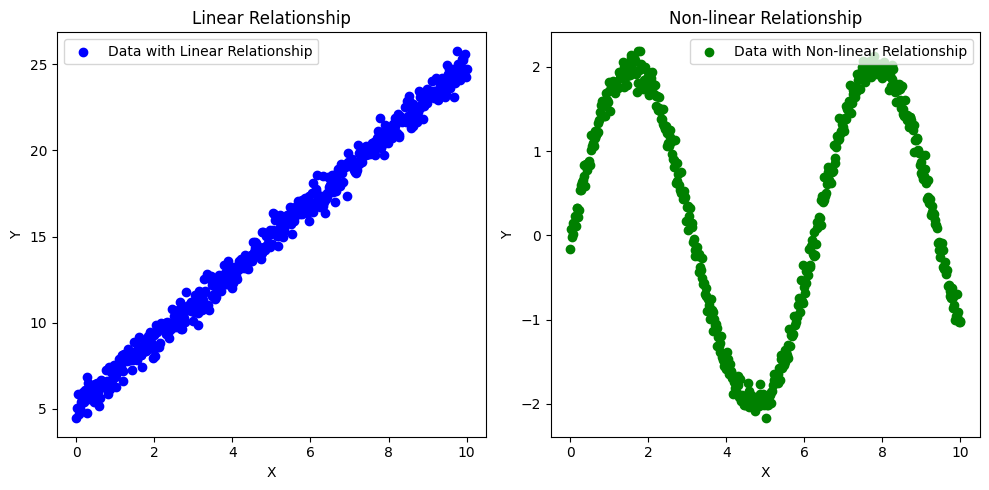

In [14]:
#linear data plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_linear, y_linear, color='blue', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#non-linear data plotting
plt.subplot(1, 2, 2)
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

##### ***Correlation coefficient of linear datasets***

In [16]:
df1.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


##### ***Correlation coefficient of non-linear datasets***

In [17]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


## ***Linear Regression for Linear Datasets***

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg1 = LinearRegression()

In [20]:
reg1.fit(x_linear, y_linear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


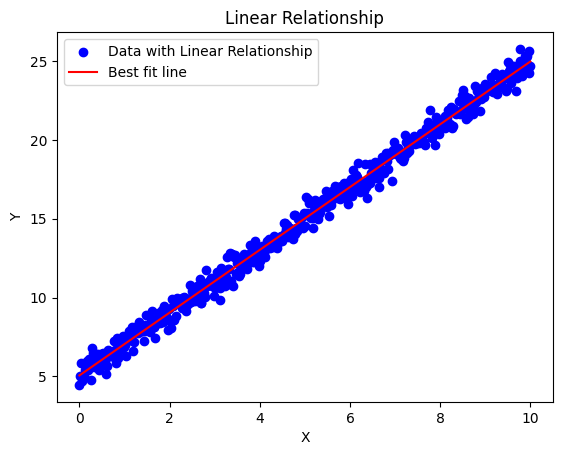

In [21]:
plt.scatter(x_linear, y_linear, color='blue', label='Data with Linear Relationship')
plt.plot(x_linear, reg1.predict(x_linear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

##### ***Accuracy for Regression***

In [24]:
reg1.score(x_linear , y_linear)

0.9928923730526016

## ***Linear Regression for Non Linear Datasets***

In [25]:
reg2 = LinearRegression()

In [26]:
reg2.fit(x_nonlinear, y_nonlinear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


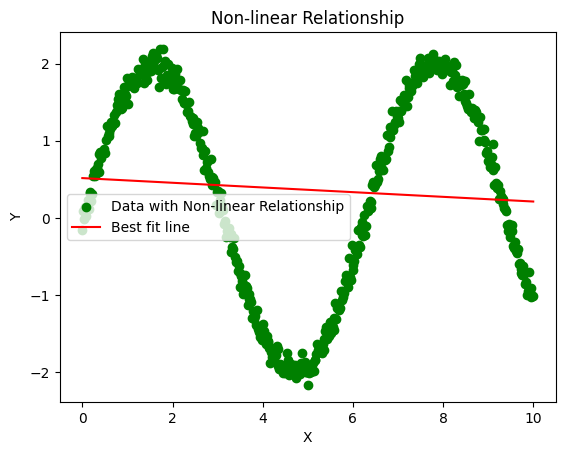

In [27]:
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.plot(x_nonlinear, reg2.predict(x_nonlinear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

##### ***Accuracy for Regression***

In [28]:
reg2.score(x_nonlinear, y_nonlinear)

0.004321199719043656

## ***Polynomial Regression for Non-Linear Datasets***

***এখানে degree=6 মানে:***            
***আমরা মূল feature এর সাথে তার 2nd power, 3rd power ... 6th power পর্যন্ত যোগ করবো।***              
***এতে model linear regression হলেও relation capture করতে পারবে যা আসলে non-linear।***            
         
***1 (bias term) + x + x² + x³ + x⁴ + x⁵ + x⁶ → মোট ৭টা কলাম।***               
***প্রতিটি row এখন একটি sample এর জন্য ৭টি মান রাখে।***

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(degree=6)

In [31]:
X_poly = poly.fit_transform(x_nonlinear)

In [32]:
reg_poly = LinearRegression()

In [33]:
reg_poly.fit(X_poly, y_nonlinear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


***এখন মডেল train হচ্ছে:***             
***ইনপুট: X_poly (500×7 polynomial feature ম্যাট্রিক্স)***            
***আউটপুট: y_nonlinear (টার্গেট ভেক্টর, shape (500,))***             

In [34]:
X_poly.shape

(500, 7)

In [35]:
reg_poly.coef_

array([[ 0.00000000e+00,  1.58461947e+00,  1.04154581e+00,
        -1.19685907e+00,  3.11779791e-01, -3.14743693e-02,
         1.10569186e-03]])

In [36]:
reg_poly.intercept_

array([-0.0042489])

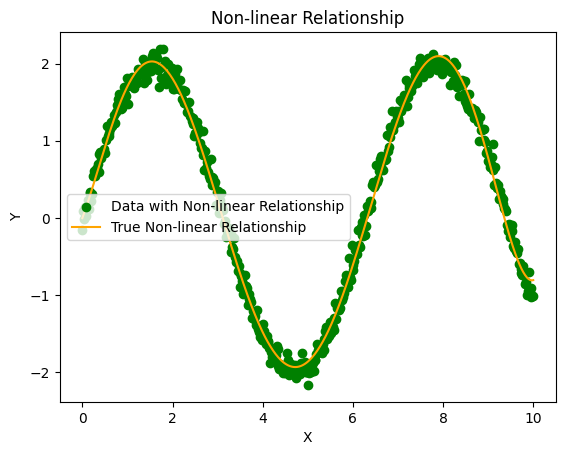

In [45]:
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.plot(x_nonlinear, reg_poly.predict(X_poly), color='orange', label='True Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

##### ***Accuracy for Regression***

In [46]:
reg_poly.score(X_poly, y_nonlinear)

0.9930624844497349

### ***Seperate Train Test***

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y_nonlinear, test_size=.30, random_state=42)

In [49]:
reg = LinearRegression()

In [51]:
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### ***Training score***

In [52]:
reg.score(X_train, y_train) 

0.9931832994582883

#### ***Testing score***

In [55]:
reg.score(X_test, y_test)

0.9926529019609499